In [38]:
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import (Conv2D, MaxPooling2D, Activation, 
                          Flatten, Dense, Dropout, BatchNormalization)
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16


total unique labels 61
61
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60]
(3726, 61)


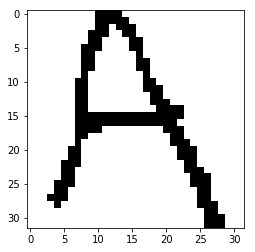

In [48]:
x_path = './hasy-alphanum/alpha_numeric_dataset/alphanum-hasy-data-X.npy'
y_path = './hasy-alphanum/alpha_numeric_dataset/alphanum-hasy-data-Y.npy'
x = np.load(x_path)
y = np.load(y_path)
print('total unique labels', len(np.unique(y)))
x_og = x
num_classes = len(np.unique(y))
# convert labels to be zero-based
for i in range(31, 57):
    y[y == i] -= 31
for i in range(70, 80):
    y[y == i] -= 44
for i in range(90, 109):
    y[y == i] -= 54
for i in range(110, 116):
    y[y == i] -= 55
    
x = x.reshape(x.shape[0], 32, 32 , 1)
x = np.squeeze(np.stack((x,) * 3, -1)) # convert to RGB


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                     random_state=0)

plt.imshow(x[3], interpolation='nearest')
print(len(np.unique(y_train)))
print(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)
print(y_train.shape)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_train/=255
x_test/=255

In [8]:
# save original images for reference
# for img, name in zip(x_og, y):
#     plt.imsave(f'./hasy-alphanum/img/{name}', img) 


In [73]:
gen = ImageDataGenerator(rotation_range=10)
train_batch = gen.flow(x_train, y_train, batch_size=128)
test_batch = gen.flow(x_test, y_test, batch_size=128)
# train_batch = ImageDataGenerator.flow(X, y_train, batch_size=64)
# single_img = next(train_batch)
# print(single_img[0].shape)
# print(single_img[1][0].shape)
# print(np.where(single_img[1][0] == 1)[0])
# single_img = single_img[0].reshape(single_img[0].shape[0], 32, 32)
# print(single_img.shape)
# plt.imshow(single_img[0])
# print(len(x_train))


In [30]:
# build model
print(x_train.ndim)
print(x_train.shape[1:])
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(61))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), 
              metrics=['accuracy'])
model.summary()

4
(32, 32, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_71 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_95 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_72 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
activation_96 (Activation)   (None, 12, 12, 64)        0      

In [33]:
# Train
start_time = time.time()
history = model.fit_generator(train_batch, steps_per_epoch=len(x_train)//64, 
                       epochs=50,
                    validation_data=test_batch, 
                    validation_steps=len(x_test)//64)
elapsed_time = time.time() - start_time
print(f'{elapsed_time:.2f} seconds')


Epoch 1/50
58/58 [==============================] - 14s 236ms/step - loss: 1.8132 - acc: 0.4400 - val_loss: 1.3631 - val_acc: 0.5207
Epoch 2/50
58/58 [==============================] - 14s 233ms/step - loss: 1.7398 - acc: 0.4652 - val_loss: 1.4575 - val_acc: 0.5276
Epoch 3/50
58/58 [==============================] - 14s 235ms/step - loss: 1.6993 - acc: 0.4735 - val_loss: 1.1791 - val_acc: 0.5991
Epoch 4/50
58/58 [==============================] - 14s 240ms/step - loss: 1.6106 - acc: 0.4910 - val_loss: 1.2364 - val_acc: 0.5795
Epoch 5/50
58/58 [==============================] - 14s 240ms/step - loss: 1.5763 - acc: 0.5144 - val_loss: 1.0445 - val_acc: 0.6462
Epoch 6/50
58/58 [==============================] - 14s 241ms/step - loss: 1.5515 - acc: 0.5023 - val_loss: 1.0885 - val_acc: 0.6141
Epoch 7/50
58/58 [==============================] - 14s 244ms/step - loss: 1.4811 - acc: 0.5242 - val_loss: 0.9619 - val_acc: 0.6555
Epoch 8/50
58/58 [==============================] - 14s 244ms/step - 

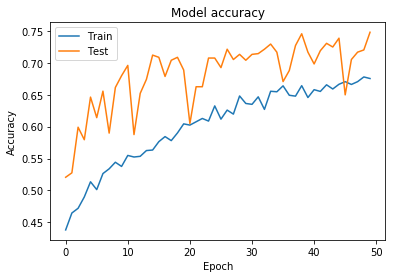

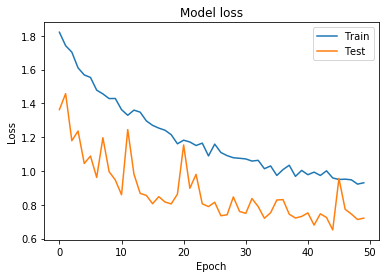

In [34]:
# plot history
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

[3.0046527e-16 1.0000000e+00 0.0000000e+00 5.5115567e-17 4.6511072e-23
 4.5690762e-28 4.3465967e-18 4.1569148e-32 2.8327221e-35 4.6429610e-27
 1.2415906e-21 0.0000000e+00 5.4159033e-28 2.1649920e-27 5.1822442e-20
 1.3862178e-17 2.5394334e-17 3.5052931e-08 1.1398124e-29 0.0000000e+00
 1.7129010e-31 0.0000000e+00 4.0241343e-25 1.8340449e-33 0.0000000e+00
 1.8556840e-27 8.1131296e-21 0.0000000e+00 6.4624371e-27 3.5058507e-14
 1.0903196e-24 4.0686703e-23 1.9387501e-17 9.9102060e-35 1.8256802e-13
 8.3655032e-27 9.3876846e-23 3.8360902e-19 3.1099738e-35 3.6698520e-31
 6.4090141e-20 6.2076521e-30 2.7144824e-20 1.6915046e-32 4.5078803e-26
 0.0000000e+00 5.1932594e-23 7.0139808e-32 2.2643211e-32 8.1181309e-32
 1.2575152e-22 9.9248894e-19 9.9725285e-32 0.0000000e+00 3.7160903e-29
 6.6324288e-31 0.0000000e+00 1.4717120e-20 1.3087213e-30 2.7578471e-37
 3.3755398e-25]
1


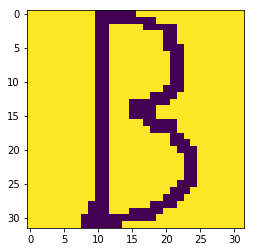

In [26]:
# prediction
model.save('alpha_numeric.h5')
index = 5
prediction = model.predict(x_test)
plt.imshow(x_test[index].reshape(32,32))
print(prediction[index])
print(np.argmax(prediction[index]))

In [80]:
# VGG19
from keras.applications.vgg19 import VGG19
#convert 28x28 grayscale to 48x48 rgb channels
vgg19_model = VGG19(include_top=False, input_shape=(32,32,3))
vgg19_model2 = VGG19()
vgg19_model2.summary()
# vgg19_model.summary()
# vgg19_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [97]:
our_model = Sequential()

for layer in vgg19_model.layers:
    our_model.add(layer)
for layer in our_model.layers:
    layer.trainable = False

our_model.summary()

our_model.add(Flatten())
our_model.add(Dropout(0.5))
our_model.add(Dense(4096))
our_model.add(Activation('relu'))

our_model.add(Dropout(0.5))
our_model.add(Dense(2048))
our_model.add(Activation('relu'))
our_model.add(Dropout(0.2))
our_model.add(Dense(61))
our_model.add(Activation('softmax'))

our_model.summary()

our_model.compile(loss='categorical_crossentropy', optimizer=Adam(), 
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 8, 8, 256)         295168    
__________

In [98]:
history = our_model.fit_generator(train_batch, steps_per_epoch=len(x_train)
                                                               //128, 
                       epochs=150,
                    validation_data=test_batch, 
                    validation_steps=len(x_test)//128)


Epoch 1/150
29/29 [==============================] - 57s 2s/step - loss: 2.7891 - acc: 0.2890 - val_loss: 1.6479 - val_acc: 0.5311
Epoch 2/150
29/29 [==============================] - 51s 2s/step - loss: 1.5338 - acc: 0.5388 - val_loss: 1.2850 - val_acc: 0.6182
Epoch 3/150
29/29 [==============================] - 51s 2s/step - loss: 1.1611 - acc: 0.6428 - val_loss: 1.0658 - val_acc: 0.6741
Epoch 4/150
29/29 [==============================] - 51s 2s/step - loss: 1.0617 - acc: 0.6477 - val_loss: 0.9841 - val_acc: 0.6931
Epoch 5/150
29/29 [==============================] - 50s 2s/step - loss: 0.9588 - acc: 0.6817 - val_loss: 0.9497 - val_acc: 0.6766
Epoch 6/150
29/29 [==============================] - 50s 2s/step - loss: 0.9069 - acc: 0.7064 - val_loss: 0.9566 - val_acc: 0.6828
Epoch 7/150
29/29 [==============================] - 51s 2s/step - loss: 0.8210 - acc: 0.7199 - val_loss: 0.8833 - val_acc: 0.7114
Epoch 8/150
29/29 [==============================] - 51s 2s/step - loss: 0.7808 - a

[1.1156122791233347, 0.753731342690501]


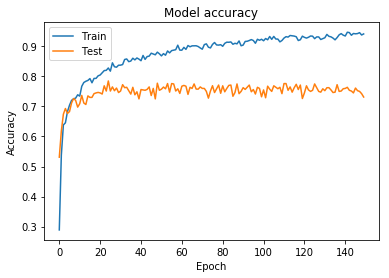

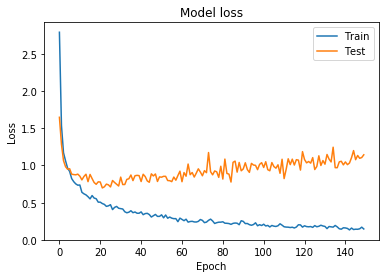

In [102]:
# plot history
from sklearn.metrics import confusion_matrix

our_model.save('VGG19_Model.h5')
result = our_model.evaluate_generator(test_batch, steps=len(x_test)//128)
test_img, test_label = next(test_batch)
test_label = test_label[:,0]

predictions = our_model.predict_generator(test_batch, steps=1)

# cm = confusion_matrix(test_label, np.round(predictions[:,0]))

print(result)

our_model.save('vgg19_model.h5')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()
